In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.shape

(614, 13)

In [6]:
train_df.drop('Loan_ID', axis=1, inplace=True)

In [7]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_df[train_df.isnull().sum(axis=1) > 1]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
236,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
411,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y


In [9]:
train_df[train_df.isnull().sum(axis=1) > 2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [10]:
train_df = train_df[train_df.isnull().sum(axis=1) < 3]

In [11]:
train_df[train_df.isnull().sum(axis=1) > 2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [12]:
train_df.isnull().sum()

Gender               13
Married               2
Dependents           14
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train_df.Married.value_counts()

Married
Yes    398
No     212
Name: count, dtype: int64

In [14]:
for col in ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_4216\542940143.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)


In [15]:
train_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

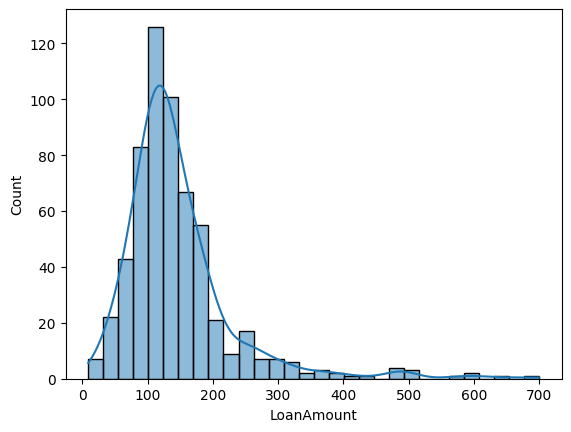

In [16]:
sns.histplot(train_df.LoanAmount, bins=30, kde=True)
plt.show()

In [17]:
train_df.LoanAmount.fillna(train_df.LoanAmount.median(), inplace=True)

C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_4216\979888394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.LoanAmount.fillna(train_df.LoanAmount.median(), inplace=True)


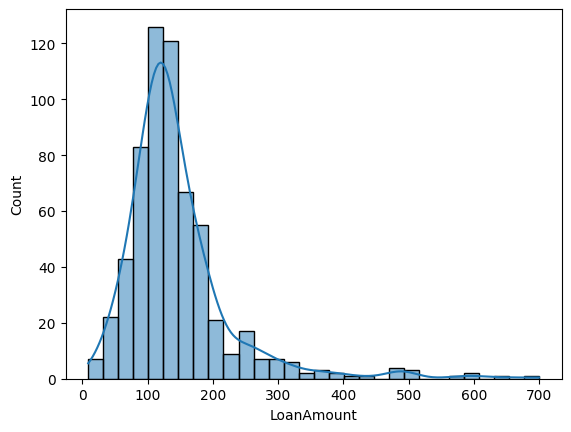

In [18]:
sns.histplot(train_df.LoanAmount, bins=30, kde=True)
plt.show()

In [19]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             612 non-null    object 
 1   Married            612 non-null    object 
 2   Dependents         612 non-null    object 
 3   Education          612 non-null    object 
 4   Self_Employed      612 non-null    object 
 5   ApplicantIncome    612 non-null    int64  
 6   CoapplicantIncome  612 non-null    float64
 7   LoanAmount         612 non-null    float64
 8   Loan_Amount_Term   612 non-null    float64
 9   Credit_History     612 non-null    float64
 10  Property_Area      612 non-null    object 
 11  Loan_Status        612 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.2+ KB


In [21]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train_df.Dependents.value_counts()

Dependents
0     358
1     102
2     101
3+     51
Name: count, dtype: int64

In [23]:
train_df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.115828,0.565853,-0.044775,-0.019294
CoapplicantIncome,-0.115828,1.000000,0.188944,-0.060736,0.011889
LoanAmount,0.565853,0.188944,1.000000,0.036586,-0.000323
Loan_Amount_Term,-0.044775,-0.060736,0.036586,1.000000,-0.003828
Credit_History,-0.019294,0.011889,-0.000323,-0.003828,1.000000


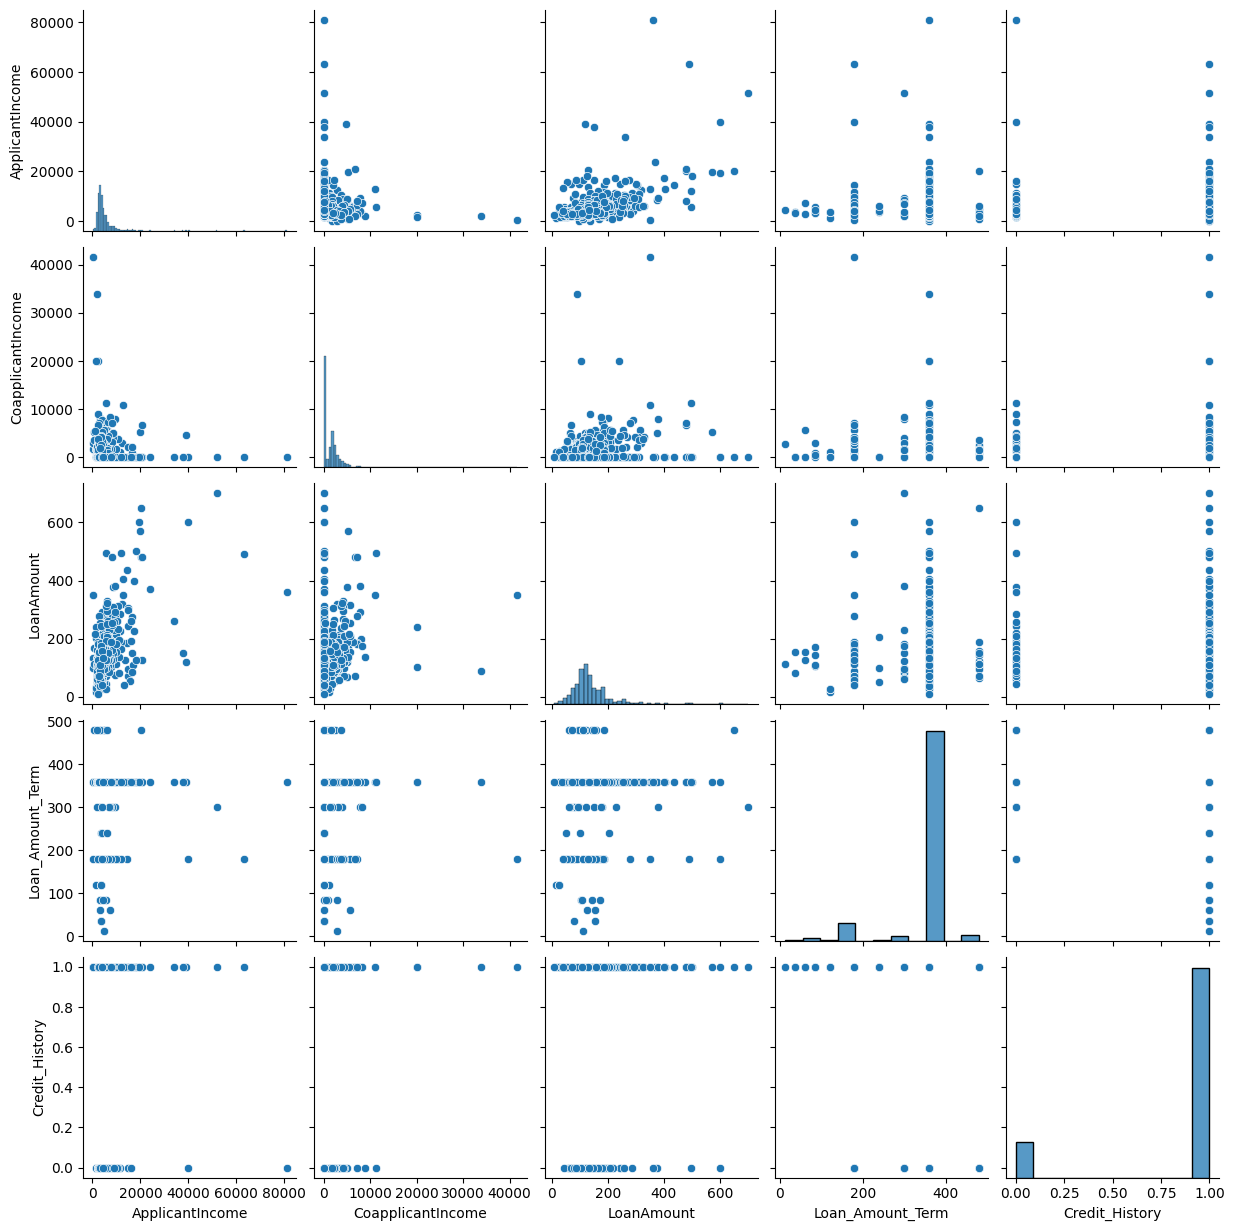

In [24]:
sns.pairplot(train_df)
plt.show()

In [25]:
train_df.Loan_Status.value_counts()

Loan_Status
Y    421
N    191
Name: count, dtype: int64

In [26]:
train_df.Loan_Status.value_counts(normalize=True)

Loan_Status
Y    0.687908
N    0.312092
Name: proportion, dtype: float64

In [27]:
train_df.Education.value_counts()

Education
Graduate        478
Not Graduate    134
Name: count, dtype: int64

In [28]:
train_df.Self_Employed.value_counts()

Self_Employed
No     530
Yes     82
Name: count, dtype: int64

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             612 non-null    object 
 1   Married            612 non-null    object 
 2   Dependents         612 non-null    object 
 3   Education          612 non-null    object 
 4   Self_Employed      612 non-null    object 
 5   ApplicantIncome    612 non-null    int64  
 6   CoapplicantIncome  612 non-null    float64
 7   LoanAmount         612 non-null    float64
 8   Loan_Amount_Term   612 non-null    float64
 9   Credit_History     612 non-null    float64
 10  Property_Area      612 non-null    object 
 11  Loan_Status        612 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.2+ KB


In [30]:
train_df.Property_Area.value_counts()

Property_Area
Semiurban    232
Urban        201
Rural        179
Name: count, dtype: int64

In [31]:
train_df.Credit_History.value_counts()

Credit_History
1.0    523
0.0     89
Name: count, dtype: int64

In [32]:
train_df[train_df.duplicated()].sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area          0
Loan_Status            0
dtype: object

In [33]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,612.000000,612.000000,612.00000,612.000000
mean,5393.619281,1626.543987,145.810458,342.54902,0.854575
std,6115.885392,2929.560873,84.238633,64.39678,0.352817
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1211.500000,128.000000,360.00000,1.000000
75%,5754.500000,2303.000000,165.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [34]:
Q1 = train_df.LoanAmount.quantile(.25)
Q3 = train_df.LoanAmount.quantile(.75)

IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("Min Value",train_df.LoanAmount.min())
print("Max Value ",train_df.LoanAmount.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ", IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 9.0
Max Value  700.0
Q1  100.0
Q3  165.0
IQR  65.0
lower_limit 2.5
upper_limit 262.5


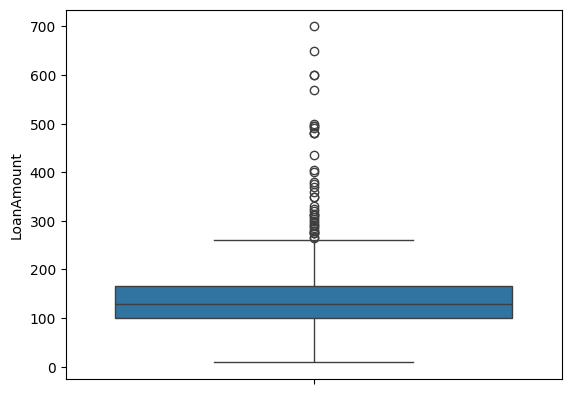

In [35]:
sns.boxplot(train_df.LoanAmount)
plt.show()

In [36]:
test_df = pd.read_csv("test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [37]:
test_df.drop('Loan_ID', axis=1, inplace=True)

In [178]:
X_train = train_df.drop('Loan_Status', axis=1)
y_train = train_df.Loan_Status

In [179]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.Gender = le.fit_transform(X_train.Gender)

In [181]:
X_train.Married = le.fit_transform(X_train.Married)

In [182]:
X_train.Dependents = le.fit_transform(X_train.Dependents)

In [130]:
X_train.Education.value_counts()

Education
Graduate        478
Not Graduate    134
Name: count, dtype: int64

In [183]:
X_train.Education = le.fit_transform(X_train.Education)

In [132]:
X_train.Self_Employed.value_counts()

Self_Employed
No     530
Yes     82
Name: count, dtype: int64

In [184]:
X_train.Self_Employed = le.fit_transform(X_train.Self_Employed)

In [134]:
X_train.Property_Area.value_counts()

Property_Area
Semiurban    232
Urban        201
Rural        179
Name: count, dtype: int64

In [185]:
X_train.Property_Area = le.fit_transform(X_train.Property_Area)

In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             612 non-null    int64  
 1   Married            612 non-null    int64  
 2   Dependents         612 non-null    int64  
 3   Education          612 non-null    int64  
 4   Self_Employed      612 non-null    int64  
 5   ApplicantIncome    612 non-null    int64  
 6   CoapplicantIncome  612 non-null    float64
 7   LoanAmount         612 non-null    float64
 8   Loan_Amount_Term   612 non-null    float64
 9   Credit_History     612 non-null    float64
 10  Property_Area      612 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 57.4 KB


In [292]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             612 non-null    object 
 1   Married            612 non-null    object 
 2   Dependents         612 non-null    object 
 3   Education          612 non-null    object 
 4   Self_Employed      612 non-null    object 
 5   ApplicantIncome    612 non-null    int64  
 6   CoapplicantIncome  612 non-null    float64
 7   LoanAmount         612 non-null    float64
 8   Loan_Amount_Term   612 non-null    float64
 9   Credit_History     612 non-null    float64
 10  Property_Area      612 non-null    object 
 11  Loan_Status        612 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.2+ KB


In [137]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [27]:
X_train = train_df.drop('Loan_Status', axis=1)
y_train = train_df.Loan_Status

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.Gender = le.fit_transform(X_train.Gender)
X_train.Married = le.fit_transform(X_train.Married)
X_train.Dependents = le.fit_transform(X_train.Dependents)
X_train.Education = le.fit_transform(X_train.Education)
X_train.Self_Employed = le.fit_transform(X_train.Self_Employed)
X_train.Property_Area = le.fit_transform(X_train.Property_Area)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [138]:
model = LogisticRegression(solver='sag', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [186]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [187]:
test_df.LoanAmount.fillna(train_df.LoanAmount.median(), inplace=True)

C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_14780\1502068641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df.LoanAmount.fillna(train_df.LoanAmount.median(), inplace=True)


In [188]:
for col in ["Loan_Amount_Term", "Credit_History"]:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

C:\Users\Risaal Khan\AppData\Local\Temp\ipykernel_14780\2724720347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)


In [189]:
test_df.Gender = le.fit_transform(test_df.Gender)
test_df.Married = le.fit_transform(test_df.Married)
test_df.Dependents = le.fit_transform(test_df.Dependents)
test_df.Education = le.fit_transform(test_df.Education)
test_df.Self_Employed = le.fit_transform(test_df.Self_Employed)
test_df.Property_Area = le.fit_transform(test_df.Property_Area)

In [36]:
y_pred = model.predict(test_df)

In [37]:
pd.Series(y_pred).value_counts()

Y    366
N      1
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver='sag', max_iter=1000)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.69105691 0.68292683 0.68852459 0.68852459 0.68852459]
Average cross-validation score: 0.6879115020658403


C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

## Building Decision Tree Classifier using Entropy Criteria

In [306]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

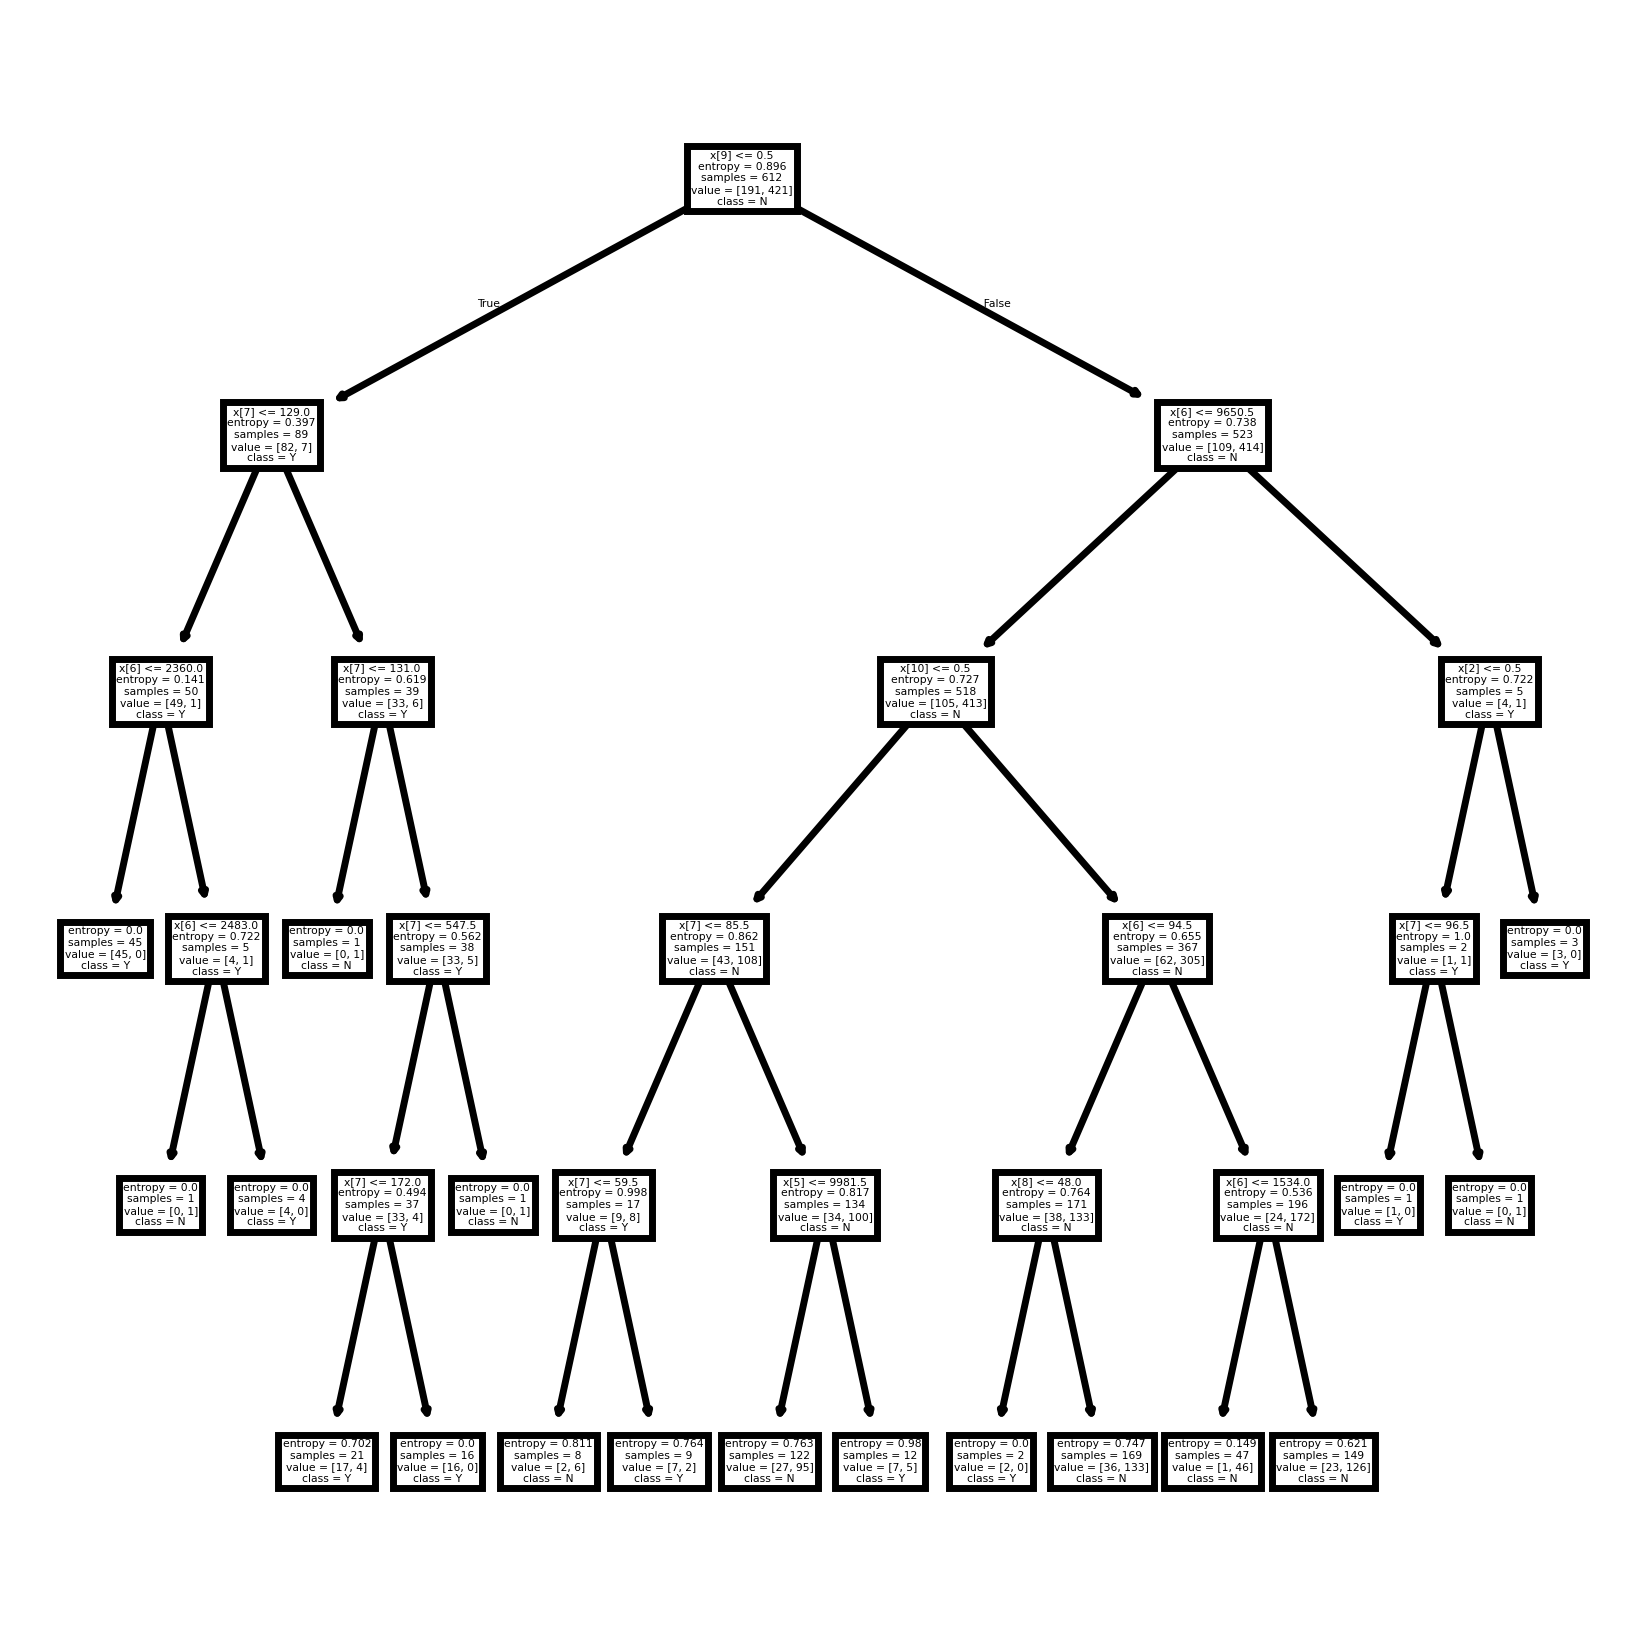

In [307]:
plt.figure(figsize=(4,4), dpi=500)
cn = ['Y', 'N']
tree.plot_tree(model, class_names=cn);

In [308]:
preds = model.predict(test_df)
pd.Series(preds).value_counts()

Y    296
N     71
Name: count, dtype: int64

In [309]:
from sklearn.model_selection import train_test_split

x = train_df.drop('Loan_Status', axis=1)
y = train_df.Loan_Status
X_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [310]:
X_train.Gender = le.fit_transform(X_train.Gender)
X_train.Married = le.fit_transform(X_train.Married)
X_train.Dependents = le.fit_transform(X_train.Dependents)
X_train.Education = le.fit_transform(X_train.Education)
X_train.Self_Employed = le.fit_transform(X_train.Self_Employed)
X_train.Property_Area = le.fit_transform(X_train.Property_Area)

In [311]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

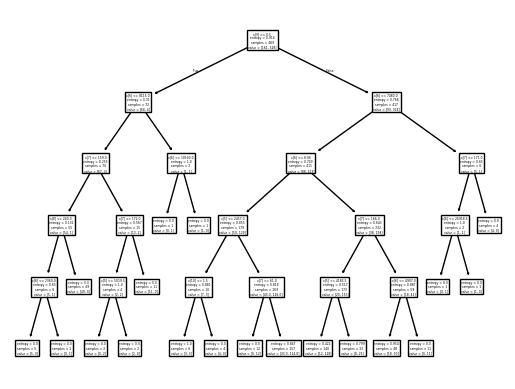

In [312]:
tree.plot_tree(model);

In [313]:
y_train.value_counts()

Loan_Status
Y    328
N    161
Name: count, dtype: int64

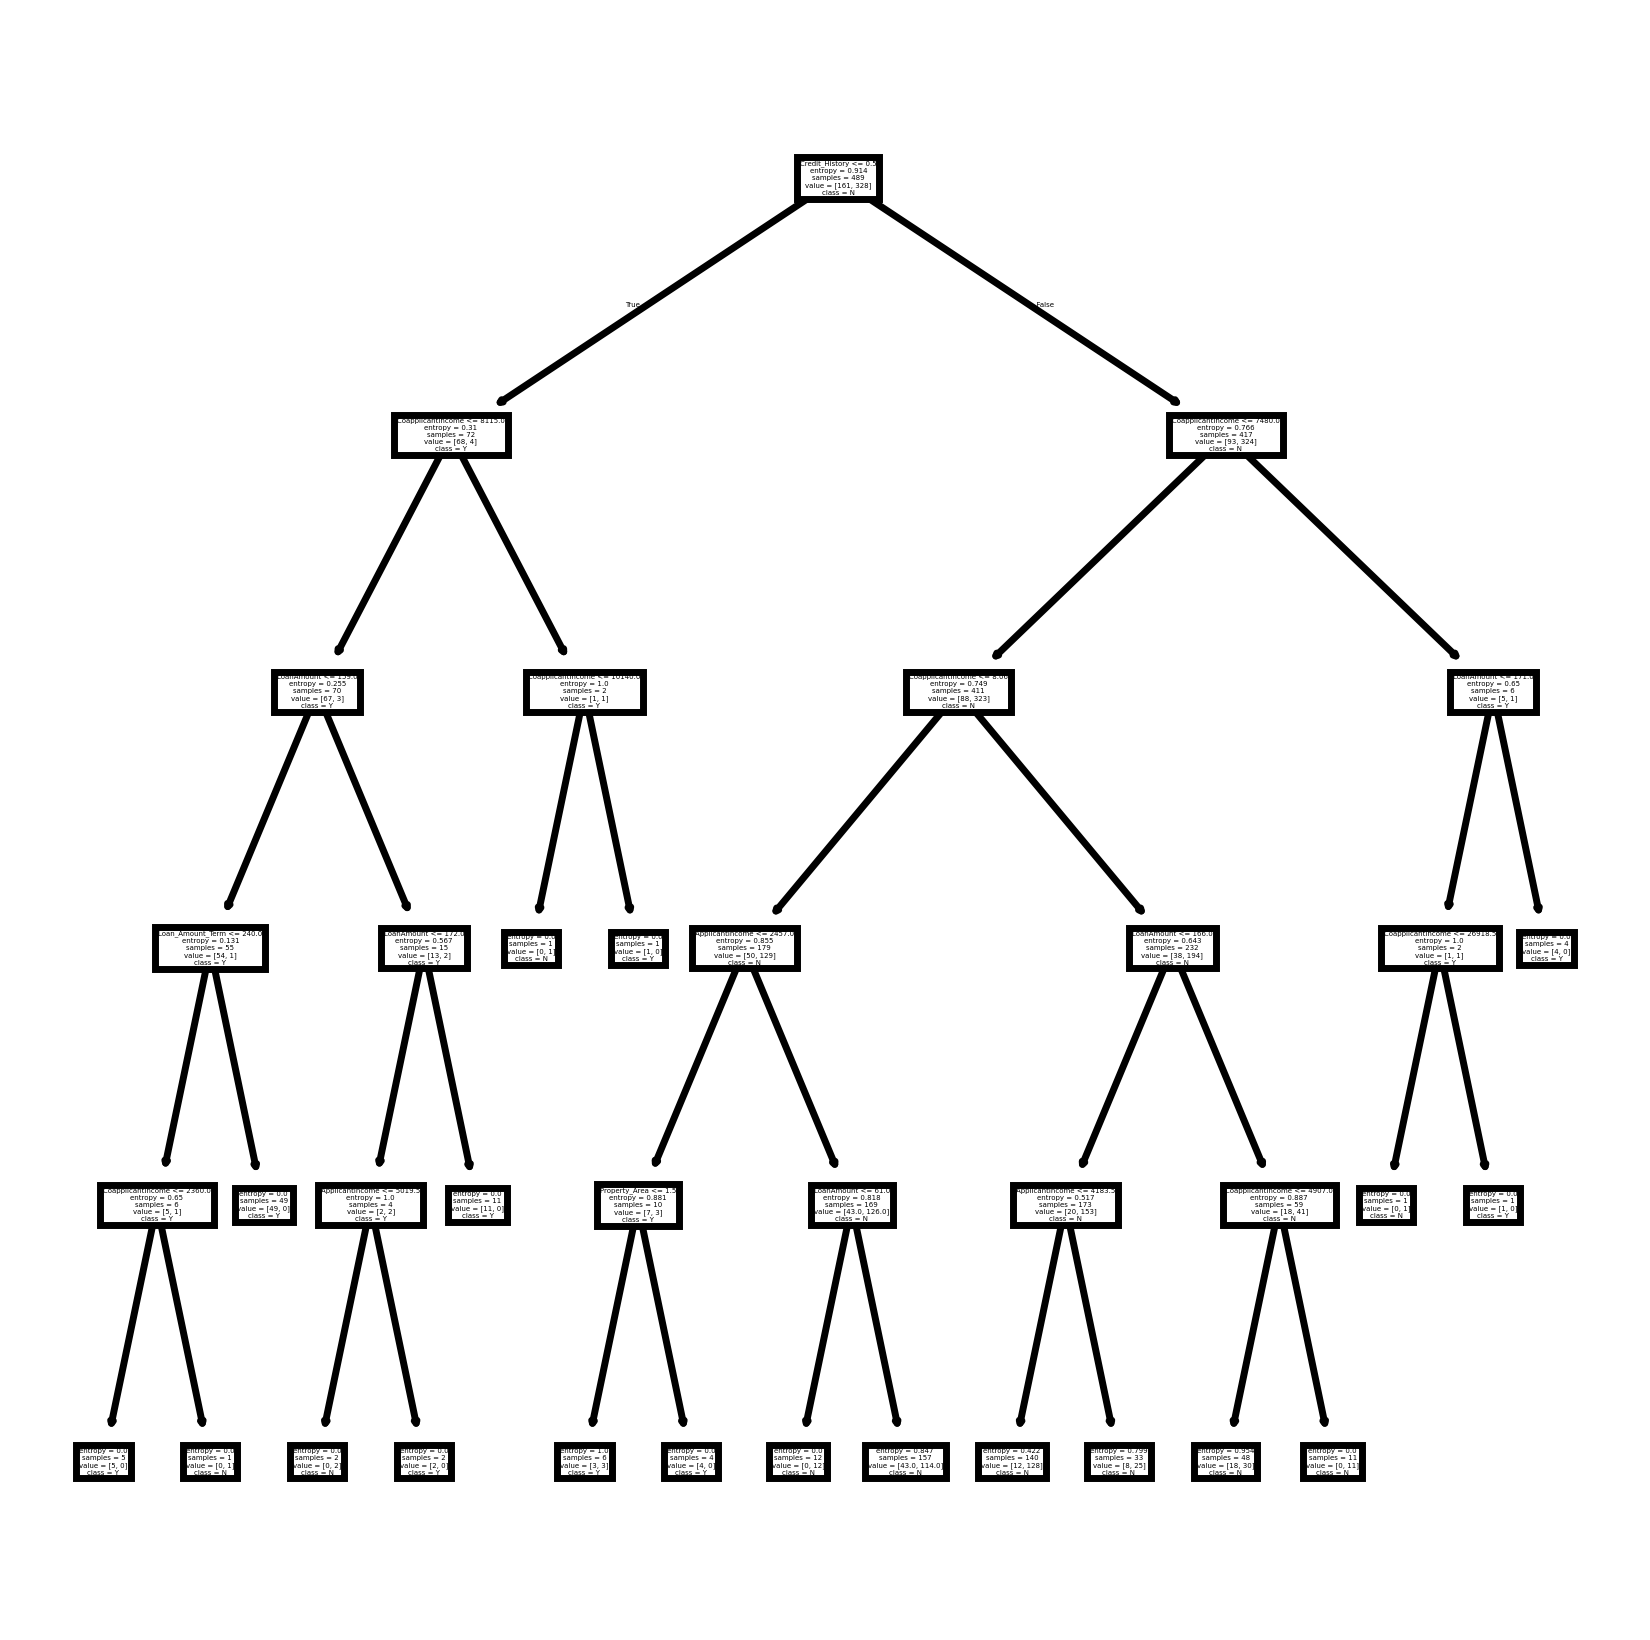

In [314]:
fn = X_train.columns.to_list()
cn = ['Y', 'N']
plt.figure(figsize=(4,4), dpi=500)

tree.plot_tree(model, feature_names = fn, class_names=cn);

In [315]:
x_test.Gender = le.fit_transform(x_test.Gender)
x_test.Married = le.fit_transform(x_test.Married)
x_test.Dependents = le.fit_transform(x_test.Dependents)
x_test.Education = le.fit_transform(x_test.Education)
x_test.Self_Employed = le.fit_transform(x_test.Self_Employed)
x_test.Property_Area = le.fit_transform(x_test.Property_Area)

In [316]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Y    103
N     20
Name: count, dtype: int64

In [317]:
import numpy as np

pd.crosstab(y_test, preds)

col_0,N,Y
Loan_Status,,
N,12,18
Y,8,85


In [318]:
np.mean(preds==y_test)

np.float64(0.7886178861788617)

In [319]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [320]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Y    101
N     22
Name: count, dtype: int64

In [321]:
pd.crosstab(y_test, preds)

col_0,N,Y
Loan_Status,,
N,14,16
Y,8,85


In [322]:
np.mean(preds==y_test)

np.float64(0.8048780487804879)

In [323]:
y_preds = model.predict(test_df)
pd.Series(y_preds).value_counts()

Y    302
N     65
Name: count, dtype: int64

## Building Decision Tree Classifier (CART) using Gini Criteria

In [324]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [325]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Y    101
N     22
Name: count, dtype: int64

In [326]:
np.mean(preds==y_test)

np.float64(0.8048780487804879)

In [327]:
y_preds = model.predict(test_df)
pd.Series(y_preds).value_counts()

Y    302
N     65
Name: count, dtype: int64

In [38]:
import numpy as np

train_df.LoanAmount = np.log1p(train_df.LoanAmount)
test_df.LoanAmount = np.log1p(test_df.LoanAmount)

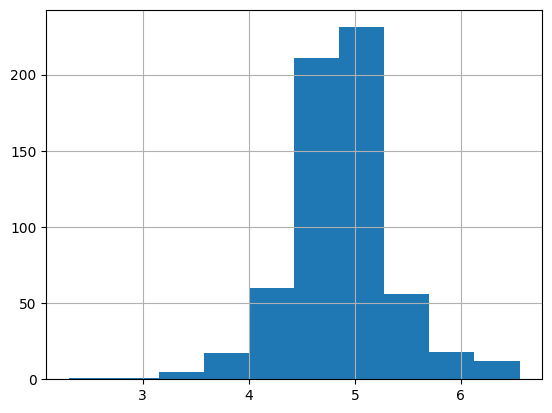

In [39]:
train_df.LoanAmount.hist()
plt.show()

In [40]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# train_df.Gender = le.fit_transform(train_df.Gender)
# train_df.Married = le.fit_transform(train_df.Married)
# train_df.Dependents = le.fit_transform(train_df.Dependents)
# train_df.Education = le.fit_transform(train_df.Education)
# train_df.Self_Employed = le.fit_transform(train_df.Self_Employed)
# train_df.Property_Area = le.fit_transform(train_df.Property_Area)

# test_df.Gender = le.fit_transform(test_df.Gender)
# test_df.Married = le.fit_transform(test_df.Married)
# test_df.Dependents = le.fit_transform(test_df.Dependents)
# test_df.Education = le.fit_transform(test_df.Education)
# test_df.Self_Employed = le.fit_transform(test_df.Self_Employed)
# test_df.Property_Area = le.fit_transform(test_df.Property_Area)

In [42]:
train_df.Gender = pd.get_dummies(train_df.Gender)
train_df.Married = pd.get_dummies(train_df.Married)
train_df.Dependents = pd.get_dummies(train_df.Dependents)
train_df.Education = pd.get_dummies(train_df.Education)
train_df.Self_Employed = pd.get_dummies(train_df.Self_Employed)
train_df.Property_Area = pd.get_dummies(train_df.Property_Area)

test_df.Gender = pd.get_dummies(test_df.Gender)
test_df.Married = pd.get_dummies(test_df.Married)
test_df.Dependents = pd.get_dummies(test_df.Dependents)
test_df.Education = pd.get_dummies(test_df.Education)
test_df.Self_Employed = pd.get_dummies(test_df.Self_Employed)
test_df.Property_Area = pd.get_dummies(test_df.Property_Area)

ValueError: Columns must be same length as key

In [41]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Loan_Status', axis=1)
y = train_df.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=40)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_clf = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.64285714 0.68367347 0.68367347 0.7244898  0.82474227]
Mean cross-validation score: 0.7118872291184515


In [44]:
# Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}

model = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10)

In [45]:
preds = model.predict(X_test)

In [46]:
pd.Series(preds).value_counts()

Y    119
N      4
Name: count, dtype: int64

In [47]:
pd.crosstab(y_test, preds)

col_0,N,Y
Loan_Status,,
N,3,27
Y,1,92


In [48]:
import numpy as np
np.mean(preds==y_test)

np.float64(0.7723577235772358)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           N       0.75      0.10      0.18        30
           Y       0.77      0.99      0.87        93

    accuracy                           0.77       123
   macro avg       0.76      0.54      0.52       123
weighted avg       0.77      0.77      0.70       123



In [296]:
test_preds = model.predict(test_df)
pd.Series(preds).value_counts()

Y    103
N     20
Name: count, dtype: int64

In [299]:
import joblib

#joblib.dump(model, 'loan_model.pkl')

['loan_model.pkl']

In [268]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [269]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

Y    103
N     20
Name: count, dtype: int64

In [270]:
pd.crosstab(y_test, preds)

col_0,N,Y
Loan_Status,,
N,14,16
Y,6,87


In [271]:
np.mean(preds==y_test)

np.float64(0.8211382113821138)

In [272]:
preds = model.predict(test_df)
pd.Series(preds).value_counts()

Y    303
N     64
Name: count, dtype: int64

# _________

In [210]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             612 non-null    object 
 1   Married            612 non-null    object 
 2   Dependents         612 non-null    object 
 3   Education          612 non-null    object 
 4   Self_Employed      612 non-null    object 
 5   ApplicantIncome    612 non-null    int64  
 6   CoapplicantIncome  612 non-null    float64
 7   LoanAmount         612 non-null    float64
 8   Loan_Amount_Term   612 non-null    float64
 9   Credit_History     612 non-null    float64
 10  Property_Area      612 non-null    object 
 11  Loan_Status        612 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.2+ KB


In [213]:
train_df['total_income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome'] # This provides a better representation of the household’s financial strength.
train_df['Income_Loan_Ratio'] = train_df["total_income"] / train_df["LoanAmount"] # This feature captures how much burden the loan is compared to the applicant’s income. A lower ratio might indicate higher chances of approval.
train_df["EMI"] = train_df["LoanAmount"] / train_df["Loan_Amount_Term"]
train_df["Loan_to_Income"] = train_df["LoanAmount"] / train_df["total_income"] # This helps identify how much the loan is relative to income.

In [214]:
test_df['total_income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome'] # This provides a better representation of the household’s financial strength.
test_df['Income_Loan_Ratio'] = test_df["total_income"] / test_df["LoanAmount"] # This feature captures how much burden the loan is compared to the applicant’s income. A lower ratio might indicate higher chances of approval.
test_df["EMI"] = test_df["LoanAmount"] / test_df["Loan_Amount_Term"]
test_df["Loan_to_Income"] = test_df["LoanAmount"] / test_df["total_income"] # This helps identify how much the loan is relative to income.

In [229]:
x = train_df.drop('Loan_Status', axis=1)
y = train_df.Loan_Status
X_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [230]:
X_train.Gender = le.fit_transform(X_train.Gender)
X_train.Married = le.fit_transform(X_train.Married)
X_train.Dependents = le.fit_transform(X_train.Dependents)
X_train.Education = le.fit_transform(X_train.Education)
X_train.Self_Employed = le.fit_transform(X_train.Self_Employed)
X_train.Property_Area = le.fit_transform(X_train.Property_Area)

In [231]:
x_test.Gender = le.fit_transform(x_test.Gender)
x_test.Married = le.fit_transform(x_test.Married)
x_test.Dependents = le.fit_transform(x_test.Dependents)
x_test.Education = le.fit_transform(x_test.Education)
x_test.Self_Employed = le.fit_transform(x_test.Self_Employed)
x_test.Property_Area = le.fit_transform(x_test.Property_Area)

In [232]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5)

In [234]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Y    117
N      6
Name: count, dtype: int64

In [235]:
pd.crosstab(y_test, preds)

col_0,N,Y
Loan_Status,,
N,5,25
Y,1,92


In [236]:
np.mean(y_test==preds)

np.float64(0.7886178861788617)

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_clf = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}


C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
228 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Risaal Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

In [238]:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5)

In [240]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Y    105
N     18
Name: count, dtype: int64

In [241]:
pd.crosstab(y_test, preds)

col_0,N,Y
Loan_Status,,
N,6,24
Y,12,81


In [242]:
np.mean(y_test==preds)

np.float64(0.7073170731707317)